In [1]:
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist

# from extra_keras_datasets import emnist

import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


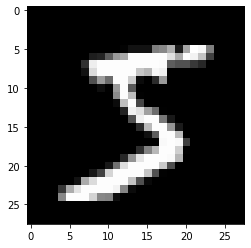

In [3]:
plt.imshow(x_train[0])
plt.gray()

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
noise_size = (8, 8)

x_train_noisy =x_train.copy()
for item in tqdm(range(x_train.shape[0])):
  n = random.randrange(20)
  for i in range(n, n + noise_size[0]):
    for j in range(n, n + noise_size[1]):
      x_train_noisy[item][i][j] = 255.0 / 2


x_test_noisy =x_test.copy()
for item in tqdm(range(x_test.shape[0])):
  n = random.randrange(20)
  for i in range(n, n + noise_size[0]):
    for j in range(n, n + noise_size[1]):
      x_test_noisy[item][i][j] = 255.0 / 2

100%|██████████| 10000/10000 [00:00<00:00, 27896.04it/s]


In [6]:
x_train_noisy = x_train_noisy.astype('float32') / 255.
x_test_noisy = x_test_noisy.astype('float32') / 255.

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

x_train_noisy = x_train_noisy.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))
x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

Original Image


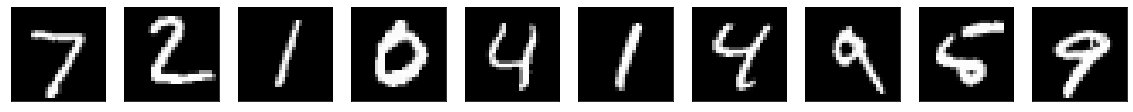

Noisy Image


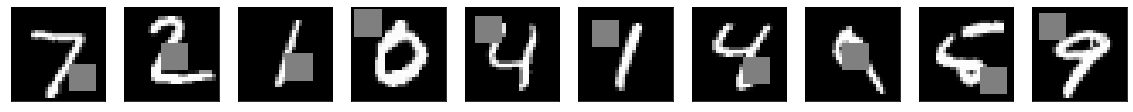

In [7]:
p = 10
print("Original Image")
plt.figure(figsize=(20, 4))
for i in range(p):
    ax = plt.subplot(1, p, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("Noisy Image")
plt.figure(figsize=(20, 4))
for i in range(p):
    ax = plt.subplot(1, p, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
encoding_dim = 30 
input_img = Input(shape=(x_train[0].shape))
encoded1 = Dense(392, activation = 'relu')(input_img)
encoded2 = Dense(100, activation = 'relu')(encoded1)
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded2 = Dense(encoding_dim, activation='relu')(encoded)
decoded1 = Dense(encoding_dim, activation='relu')(decoded2)
decoded = Dense(784, activation='sigmoid')(decoded1)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 30)                23550     
                                                                 
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 784)               24304     
                                                                 
Total params: 49,714
Trainable params: 49,714
Non-trainable params: 0
_________________________________________________________________


In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
history = autoencoder.fit(x_train_noisy, x_train, epochs=30, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/30
235/235 [==============================] - 4s 14ms/step - loss: 0.2926 - val_loss: 0.2112
Epoch 2/30
235/235 [==============================] - 4s 15ms/step - loss: 0.1929 - val_loss: 0.1786
Epoch 3/30
235/235 [==============================] - 6s 27ms/step - loss: 0.1722 - val_loss: 0.1651
Epoch 4/30
235/235 [==============================] - 5s 22ms/step - loss: 0.1622 - val_loss: 0.1565
Epoch 5/30
235/235 [==============================] - 6s 26ms/step - loss: 0.1538 - val_loss: 0.1490
Epoch 6/30
235/235 [==============================] - 6s 25ms/step - loss: 0.1481 - val_loss: 0.1450
Epoch 7/30
235/235 [==============================] - 5s 19ms/step - loss: 0.1445 - val_loss: 0.1417
Epoch 8/30
235/235 [==============================] - 3s 14ms/step - loss: 0.1420 - val_loss: 0.1394
Epoch 9/30
235/235 [==============================] - 3s 13ms/step - loss: 0.1403 - val_loss: 0.1382
Epoch 10/30
235/235 [==============================] - 3s 14ms/step - loss: 0.1387 - val_lo

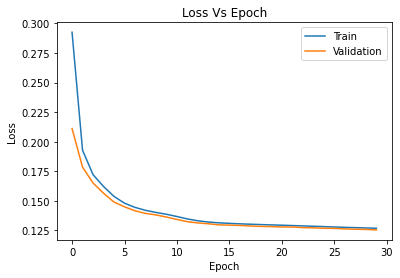

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [12]:
pred = autoencoder.predict(x_test_noisy)

Original Image


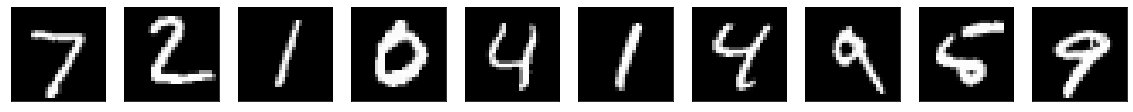

Noisy Image


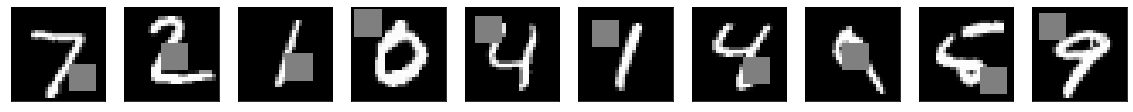

Reconstructed Image


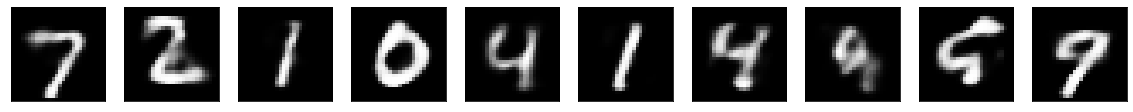

In [13]:
p = 10
print("Original Image")
plt.figure(figsize=(20, 4))
for i in range(p):
    ax = plt.subplot(1, p, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("Noisy Image")
plt.figure(figsize=(20, 4))
for i in range(p):
    ax = plt.subplot(1, p, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("Reconstructed Image")
plt.figure(figsize=(20, 4))
for i in range(p):
    ax = plt.subplot(1, p, i + 1)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()